#### Tasks:


### 1. Data Loading and Initial Exploration:

- Load the dataset into a Pandas DataFrame.
- Display basic information about the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the Modified Heart dataset

df = pd.read_csv('C:/Users/fadi-/Python_OP2/Final Assignment/modified_heart_dataset_supervised.csv')


In [2]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,0.046501,11560,Normal,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,0.619699,8575,Overweight,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,0.561993,10545,Overweight,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,0.345920,10272,Obese,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,0.315190,10368,Underweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,0.125356,12060,Normal,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,0.336965,12920,Overweight,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,0.999544,7296,Underweight,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,0.405751,13452,Obese,1


In [3]:
# display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 918 non-null    int64  
 1   Sex                 918 non-null    object 
 2   ChestPainType       918 non-null    object 
 3   RestingBP           918 non-null    int64  
 4   Cholesterol         918 non-null    int64  
 5   FastingBS           918 non-null    int64  
 6   RestingECG          918 non-null    object 
 7   MaxHR               918 non-null    int64  
 8   ExerciseAngina      918 non-null    object 
 9   Oldpeak             918 non-null    float64
 10  ST_Slope            918 non-null    object 
 11  GeneticMarker1      918 non-null    float64
 12  GeneticMarker2      918 non-null    int64  
 13  BodyWeightCategory  918 non-null    object 
 14  HeartDisease        918 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 107.7+ K

### 2. Data Preparation 

In [4]:
# check for NaN values
df.isnull().sum()

# no NaN values

Age                   0
Sex                   0
ChestPainType         0
RestingBP             0
Cholesterol           0
FastingBS             0
RestingECG            0
MaxHR                 0
ExerciseAngina        0
Oldpeak               0
ST_Slope              0
GeneticMarker1        0
GeneticMarker2        0
BodyWeightCategory    0
HeartDisease          0
dtype: int64

In [5]:
# check for duplicates
df[df.duplicated()]

# no duplicates

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease


### 3. Exploratory Data Analysis (EDA)

In [6]:
# display statical data
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,GeneticMarker1,GeneticMarker2,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.239651,198.787582,0.233115,136.643791,0.887364,0.508888,10540.282135,0.553377
std,9.432617,18.804257,109.529397,0.423046,25.662700,1.066570,0.291353,6242.988493,0.497414
min,28.000000,1.000000,-5.000000,0.000000,56.000000,-2.600000,0.000188,-365.000000,0.000000
25%,47.000000,120.000000,173.000000,0.000000,118.000000,0.000000,0.254569,7724.750000,0.000000
50%,54.000000,131.000000,223.000000,0.000000,137.000000,0.600000,0.526046,11439.000000,1.000000
75%,60.000000,143.000000,267.000000,0.000000,156.000000,1.500000,0.761030,14664.750000,1.000000
max,77.000000,201.000000,607.000000,1.000000,201.000000,6.200000,0.999714,37520.000000,1.000000


- Before training the model examine if there are outliers in the dataset
- Visually identify outliers in the data set using boxplots

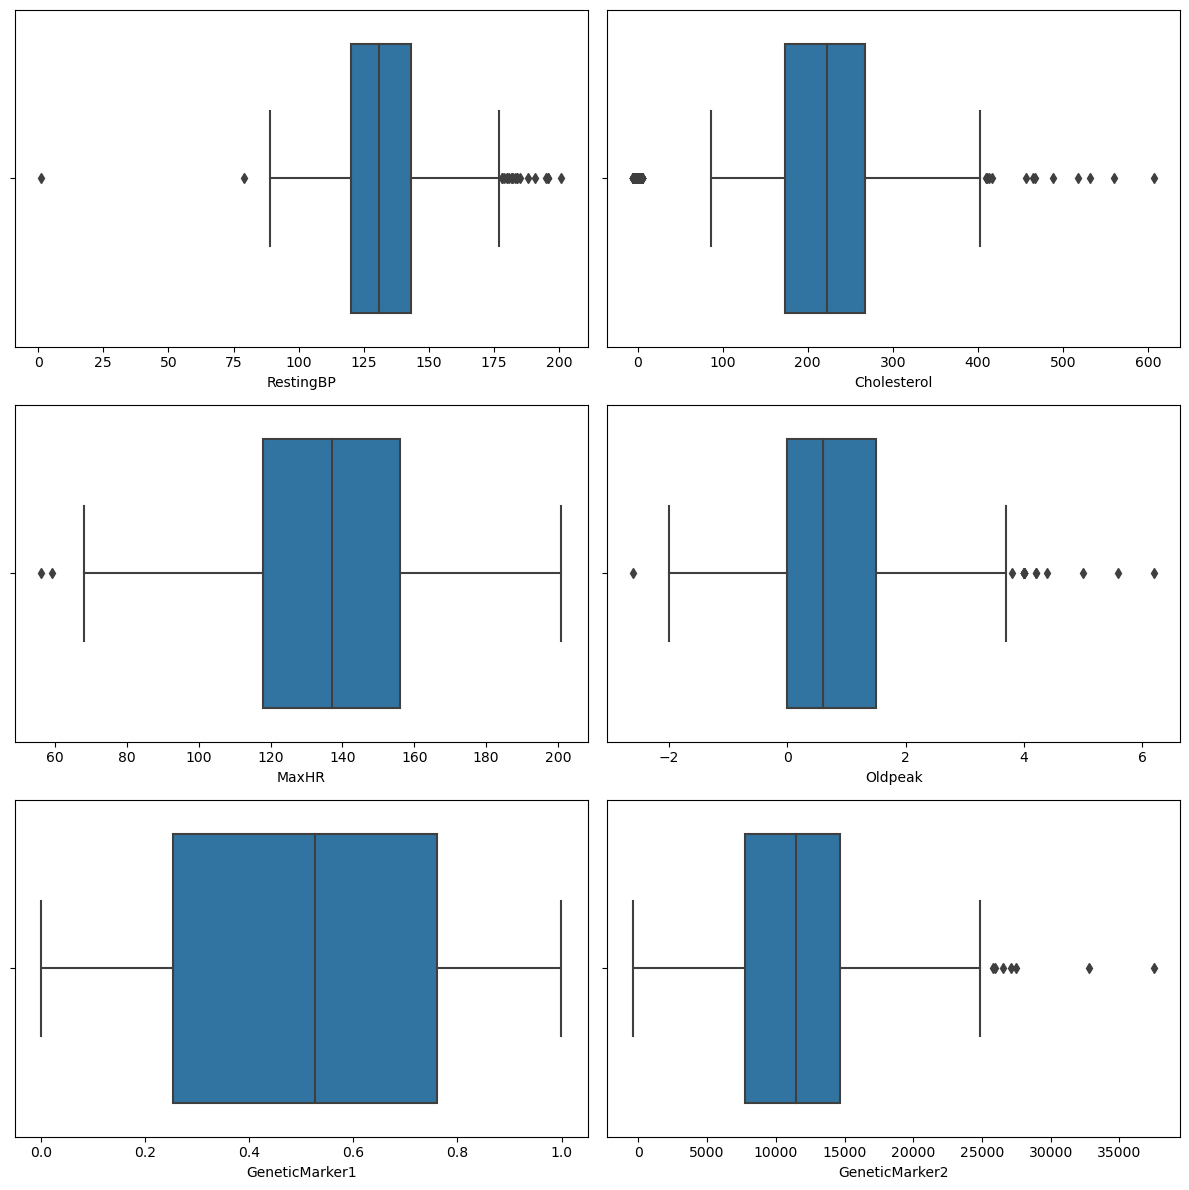

In [7]:
#First identify outliers using boxplots
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,12))

#plot 1
sns.boxplot(x='RestingBP', data=df, ax=ax[0, 0])

# Plot 2
sns.boxplot(x='Cholesterol', data=df, ax=ax[0, 1])

# Plot 3
sns.boxplot(x='MaxHR', data=df, ax=ax[1, 0])

# Plot 4
sns.boxplot(x='Oldpeak', data=df, ax=ax[1,1])

#plot 5
sns.boxplot(x='GeneticMarker1', data=df, ax=ax[2, 0])

#plot 6
sns.boxplot(x='GeneticMarker2', data=df, ax=ax[2, 1])

plt.tight_layout()
plt.show()

#Every column, expect GeneticMarker1, has outliers

Use the correlation matrix to see which columns don't have a correlation

- Use the IQR method to specify the outliers.
- Use the same method for the RestingBP, Cholesterol, MaxHR, GeneticMarker2

In [8]:
#Use IQR Method on the RestingBP
#find the q1, q3 and iqr (blue box)
q1 = df['RestingBP'].quantile(0.25)
q3= df['RestingBP'].quantile(0.75)
iqr = q3-q1
#find the limits, every data outside of these limits will be considered outliers
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(85.5, 177.5)

In [9]:
#find the outliers
df.loc[(df['RestingBP'] > upper_limit) | (df['RestingBP'] < lower_limit)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
109,39,M,ATA,191,239,0,Normal,101,N,0.0,Up,0.117644,9321,Underweight,0
123,58,F,ATA,179,397,0,Normal,111,Y,1.0,Flat,0.029364,23026,Underweight,1
189,53,M,ASY,182,280,0,ST,123,Y,1.5,Flat,0.412761,14840,Underweight,1
241,54,M,ASY,195,193,0,Normal,145,Y,2.0,Flat,0.032646,10422,Underweight,1
274,45,F,ATA,182,299,0,Normal,178,N,0.0,Up,0.238857,13455,Obese,0
275,59,M,NAP,178,210,0,Normal,98,N,0.0,Up,0.469642,12390,Normal,0
278,57,F,ASY,178,348,0,ST,127,Y,0.8,Flat,0.622520,19836,Overweight,0
314,53,M,ASY,79,1,0,Normal,145,Y,2.0,Down,0.718429,53,Overweight,0
365,64,F,ASY,196,-1,0,Normal,140,Y,1.0,Flat,0.542534,-64,Normal,1
372,63,M,ASY,183,3,0,Normal,103,Y,0.0,Up,0.759351,189,Overweight,1


In [10]:
#trim the data, delete the outliers
df = df.loc[(df['RestingBP'] < upper_limit) & (df['RestingBP'] > lower_limit)]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,0.046501,11560,Normal,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,0.619699,8575,Overweight,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,0.561993,10545,Overweight,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,0.345920,10272,Obese,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,0.315190,10368,Underweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,0.125356,12060,Normal,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,0.336965,12920,Overweight,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,0.999544,7296,Underweight,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,0.405751,13452,Obese,1


In [11]:
#Use IQR Method on Cholesterol
#find the q1, q3 and iqr (blue box)
q1 = df['Cholesterol'].quantile(0.25)
q3= df['Cholesterol'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

##find the limits, every data outside of these limits will be considered outliers
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(36.0, 404.0)

In [12]:
#find the outliers
df.loc[(df['Cholesterol'] > upper_limit) | (df['Cholesterol'] < lower_limit)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
28,53,F,ATA,108,465,0,Normal,127,N,0.0,Up,0.417990,24645,Obese,0
30,53,M,NAP,150,518,0,Normal,126,N,0.0,Flat,0.683754,27454,Normal,1
69,44,M,ASY,146,411,0,Normal,167,N,0.0,Up,0.557981,18084,Underweight,0
76,32,M,ASY,117,532,0,Normal,128,N,0.0,Flat,0.371933,17024,Obese,1
103,40,M,ASY,123,467,1,Normal,149,Y,1.0,Flat,0.732635,18680,Obese,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,62,M,NAP,128,-4,1,ST,117,Y,1.2,Flat,0.280334,-248,Obese,1
616,67,F,NAP,110,560,0,LVH,155,N,1.6,Flat,0.116023,37520,Overweight,0
624,63,F,ASY,149,410,0,LVH,156,N,4.0,Flat,0.875511,25830,Obese,1
667,65,F,NAP,135,417,1,LVH,160,N,0.8,Up,0.823309,27105,Underweight,0


In [13]:
#trim the data, delete the outliers
df = df.loc[(df['Cholesterol'] < upper_limit) & (df['Cholesterol'] > lower_limit)]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,0.046501,11560,Normal,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,0.619699,8575,Overweight,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,0.561993,10545,Overweight,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,0.345920,10272,Obese,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,0.315190,10368,Underweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,0.125356,12060,Normal,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,0.336965,12920,Overweight,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,0.999544,7296,Underweight,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,0.405751,13452,Obese,1


In [14]:
#Use IQR Method on Oldpeak
#find the q1, q3 and iqr (blue box)
q1 = df['Oldpeak'].quantile(0.25)
q3= df['Oldpeak'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

#find the limits, every data outside of these limits are considered outliers
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-2.25, 404.0)

In [15]:
#find the outliers
df.loc[(df['Oldpeak'] > upper_limit) | (df['Oldpeak'] < lower_limit)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease


In [16]:
#trim the data, delete the outliers
df = df.loc[(df['Oldpeak'] < upper_limit) & (df['Oldpeak'] > lower_limit)]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,0.046501,11560,Normal,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,0.619699,8575,Overweight,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,0.561993,10545,Overweight,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,0.345920,10272,Obese,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,0.315190,10368,Underweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,0.125356,12060,Normal,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,0.336965,12920,Overweight,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,0.999544,7296,Underweight,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,0.405751,13452,Obese,1


In [17]:
#Use IQR Method on MaxHR
#find the q1, q3 and iqr (blue box)
q1 = df['MaxHR'].quantile(0.25)
q3= df['MaxHR'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

#find the limits, every data outside of these limits are considered outliers
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(66.5, 214.5)

In [18]:
##find the outliers
df.loc[(df['MaxHR'] > upper_limit) | (df['MaxHR'] < lower_limit)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease


In [19]:
#trim the data, delete the outliers
df = df.loc[(df['MaxHR'] < upper_limit) & (df['MaxHR'] > lower_limit)]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,0.046501,11560,Normal,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,0.619699,8575,Overweight,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,0.561993,10545,Overweight,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,0.345920,10272,Obese,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,0.315190,10368,Underweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,0.125356,12060,Normal,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,0.336965,12920,Overweight,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,0.999544,7296,Underweight,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,0.405751,13452,Obese,1


In [20]:
#Use IQR Method on GeneticMarker2
#find the q1, q3 and iqr (blue box)
q1 = df['GeneticMarker2'].quantile(0.25)
q3= df['GeneticMarker2'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

##find the limits, every data outside of these limits are considered outliers
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(2563.625, 22796.625)

In [21]:
##find the outliers
df.loc[(df['GeneticMarker2'] > upper_limit) | (df['GeneticMarker2'] < lower_limit)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
498,67,M,ASY,164,387,1,ST,128,Y,0.0,Flat,0.298435,25929,Obese,1
556,75,M,ASY,165,307,1,Normal,112,Y,2.0,Down,0.863401,23025,Underweight,0
577,67,M,ASY,141,371,0,Normal,109,Y,1.9,Flat,0.526278,24857,Overweight,1
603,74,M,ASY,156,309,0,Normal,116,Y,1.5,Down,0.082715,22866,Obese,1
738,65,F,NAP,155,365,0,LVH,152,N,0.8,Up,0.527265,23725,Underweight,0
803,62,F,ASY,137,392,0,LVH,155,N,1.2,Flat,0.960168,24304,Underweight,0
814,77,M,ASY,128,309,0,LVH,163,Y,0.0,Up,0.177888,23793,Underweight,1


In [22]:
#trim the data, delete the outliers
df = df.loc[(df['GeneticMarker2'] < upper_limit) & (df['GeneticMarker2'] > lower_limit)]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,0.046501,11560,Normal,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,0.619699,8575,Overweight,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,0.561993,10545,Overweight,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,0.345920,10272,Obese,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,0.315190,10368,Underweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,0.125356,12060,Normal,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,0.336965,12920,Overweight,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,0.999544,7296,Underweight,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,0.405751,13452,Obese,1


In [23]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,GeneticMarker1,GeneticMarker2,HeartDisease
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,52.654979,131.758766,238.939691,0.159888,140.245442,0.896494,0.508854,12600.653576,0.471248
std,9.401853,16.212186,49.723624,0.366759,24.665630,1.073860,0.293447,3509.218688,0.499523
min,28.000000,89.000000,86.000000,0.000000,71.000000,-0.100000,0.000188,3836.000000,0.000000
25%,46.000000,120.000000,206.000000,0.000000,122.000000,0.000000,0.253821,10143.000000,0.000000
50%,54.000000,131.000000,235.000000,0.000000,141.000000,0.500000,0.522540,12320.000000,0.000000
75%,59.000000,142.000000,272.000000,0.000000,159.000000,1.500000,0.763108,15048.000000,1.000000
max,77.000000,177.000000,403.000000,1.000000,201.000000,6.200000,0.999714,22562.000000,1.000000


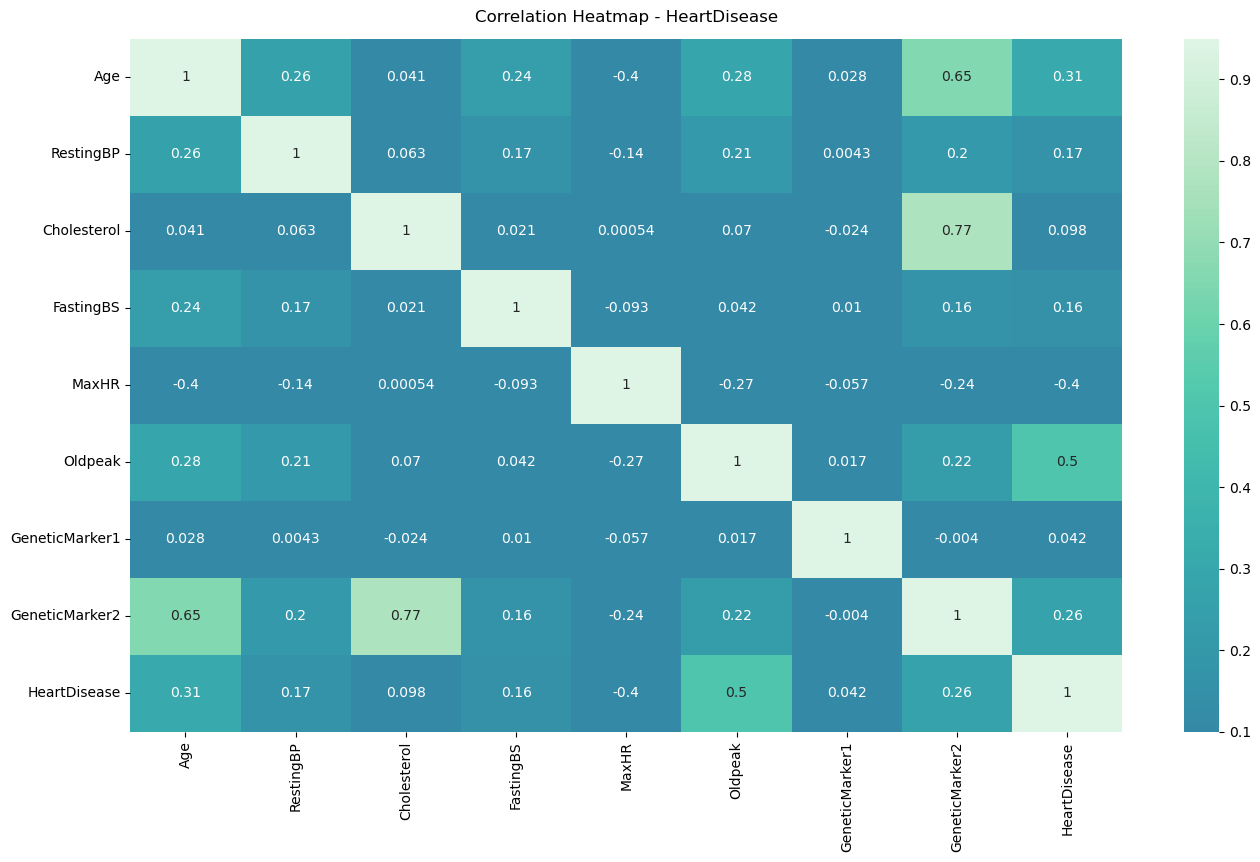

In [24]:
plt.figure(figsize=(16, 9))
cor = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'GeneticMarker1', 'GeneticMarker2', 'HeartDisease']].corr()
heatmap = sns.heatmap(data=cor, annot=True, vmin=0.1, vmax=0.95, center=0, cmap='mako')
heatmap.set_title('Correlation Heatmap - HeartDisease', fontdict={'fontsize':12}, pad=12)

plt.show()

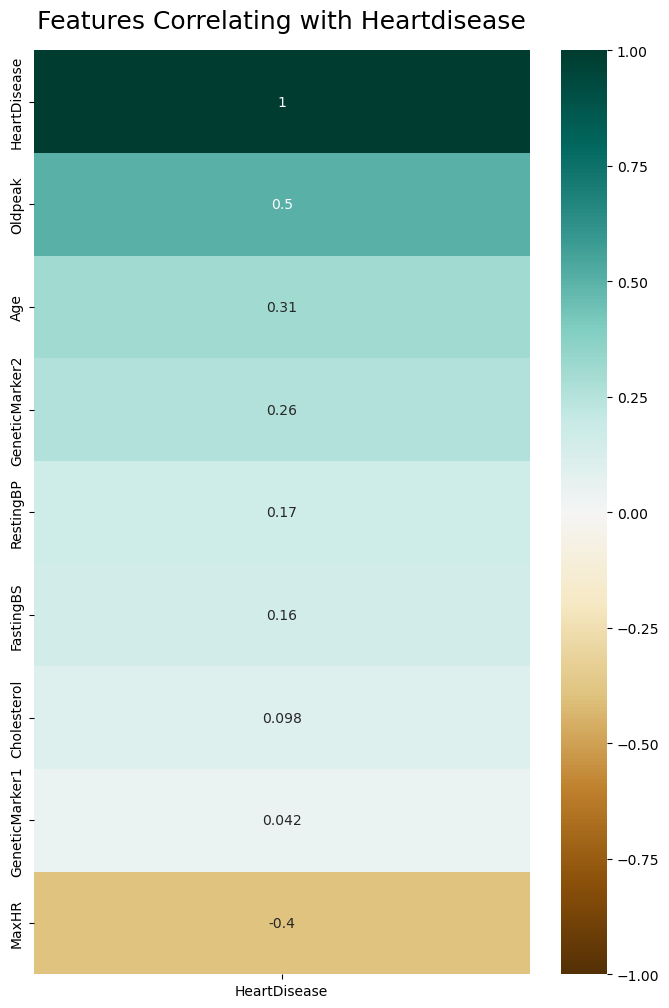

In [25]:
# Looking at this diagram it seems like MAXHR and GeneticMarker1 don't havee a correlation with the heartdisease. 
# GeneticMarker2 has a good correalation so that one won't be deleted. 
# Cholesterol doesnt have a good correlation in this diagram but as seen before there is a correlation. 
# MaxHR and GeneticMarker1 will be analysed further on.
plt.figure(figsize=(8, 12))
cor = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'GeneticMarker1', 'GeneticMarker2', 'HeartDisease']].corr()
heatmap = sns.heatmap(data=cor[['HeartDisease']].sort_values(by='HeartDisease', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Heartdisease', fontdict={'fontsize':18}, pad=16);

plt.show()

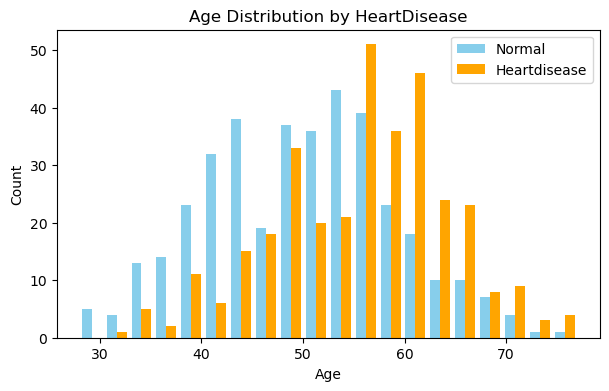

In [26]:
# Explore age distribution by HeartDisease
# As seen in the histogram  the chances of having heart disease go up after the age of 55
plt.figure(figsize=(7, 4))

plt.hist([df[df["HeartDisease"] == 0]["Age"], df[df["HeartDisease"] == 1]["Age"]], bins=20, color=["skyblue", "orange"], label=["Normal", "Heartdisease"])

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by HeartDisease')
plt.legend()

plt.show()

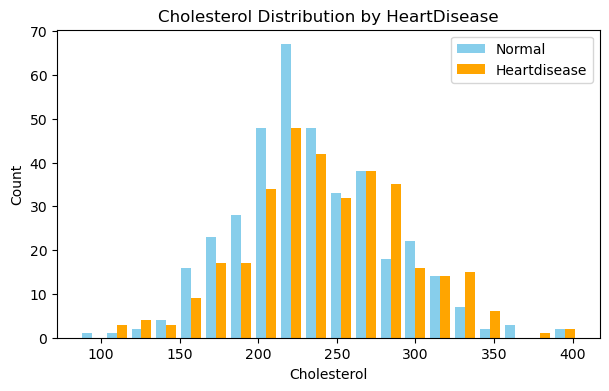

In [27]:
# Explore cholesterol distribution by HeartDisease
# the amount of heart diseases tends to get higher when the cholesterol levels get higer
plt.figure(figsize=(7, 4))

plt.hist([df[df["HeartDisease"] == 0]["Cholesterol"], df[df["HeartDisease"] == 1]["Cholesterol"]], bins=20, color=["skyblue", "orange"], label=["Normal", "Heartdisease"])

plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.title('Cholesterol Distribution by HeartDisease')
plt.legend()

plt.show()

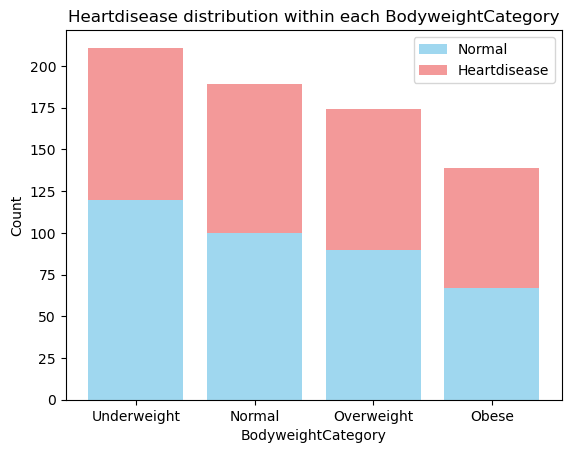

In [28]:
# analyse the distribution of heartdisease in correlation with bodyweight
# As seen in the bar chart, there is no correlation between bodyweight and heartdisease
categories = ['Underweight', 'Normal', 'Overweight', 'Obese'] 
x = df["BodyWeightCategory"]

hd_count = df[df['HeartDisease'] == 1]['BodyWeightCategory'].value_counts() 
no_hd_count = df[df['HeartDisease'] == 0]['BodyWeightCategory'].value_counts()

plt.bar(categories, no_hd_count, color='skyblue', alpha=0.8, label='Normal')
plt.bar(categories, hd_count, bottom=no_hd_count, color='lightcoral', alpha=0.8, label='Heartdisease')

plt.xlabel('BodyweightCategory')
plt.ylabel('Count')
plt.title('Heartdisease distribution within each BodyweightCategory')

plt.legend()
plt.show()



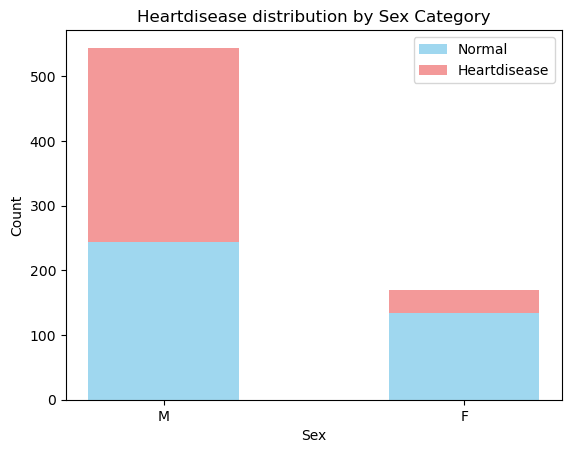

In [29]:
# Analyze the distribution of heartdisease by sex category
# In the male category the heartdisease cases are balanced 
# Whereas in the female section the normal cases are way higer 
categories = ['M', 'F'] 
x = df["Sex"]

hd_count = df[df['HeartDisease'] == 1]['Sex'].value_counts() 
no_hd_count = df[df['HeartDisease'] == 0]['Sex'].value_counts()

plt.bar(categories, no_hd_count, color='skyblue', alpha=0.8, width=0.5, label='Normal')
plt.bar(categories, hd_count, bottom=no_hd_count, color='lightcoral', alpha=0.8, width=0.5, label='Heartdisease')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Heartdisease distribution by Sex Category')

plt.legend()
plt.show()

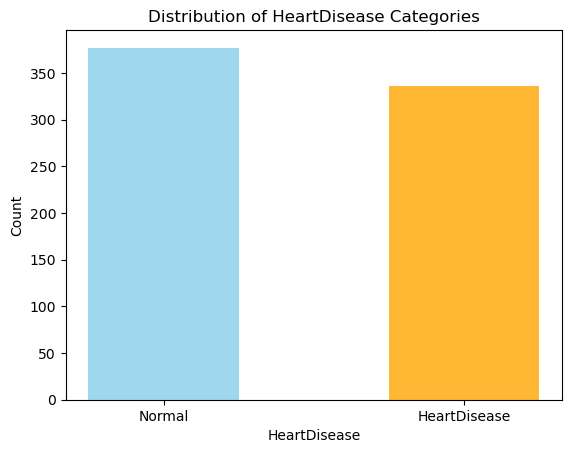

In [30]:
# Analyze the distribution of heartdisease categories
# The normal and the heartdisease cases are fairly balanced which is good for the accuray model training
HeartDisease = ['Normal', 'HeartDisease'] 
x = df["HeartDisease"]

normal = df[df['HeartDisease'] == 0]['HeartDisease'].count()
Heartdisease = df[df['HeartDisease'] == 1]['HeartDisease'].count()

plt.bar(HeartDisease, [normal, Heartdisease], color=['skyblue', 'orange'], alpha=0.8, width=0.5)

plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.title('Distribution of HeartDisease Categories')

plt.show()


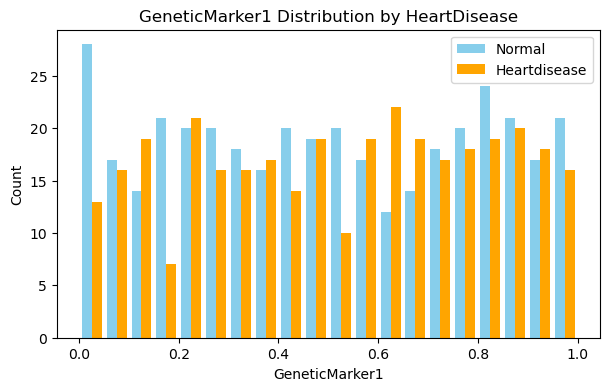

In [33]:
# Explore GeneticMarker1 distribution by HeartDisease
# There is no sign of a correlation between HeartDisease and GeneticMarker1
plt.figure(figsize=(7, 4))

plt.hist([df[df["HeartDisease"] == 0]["GeneticMarker1"], df[df["HeartDisease"] == 1]["GeneticMarker1"]], bins=20, color=["skyblue", "orange"], label=["Normal", "Heartdisease"])

plt.xlabel('GeneticMarker1')
plt.ylabel('Count')
plt.title('GeneticMarker1 Distribution by HeartDisease')
plt.legend()

plt.show()

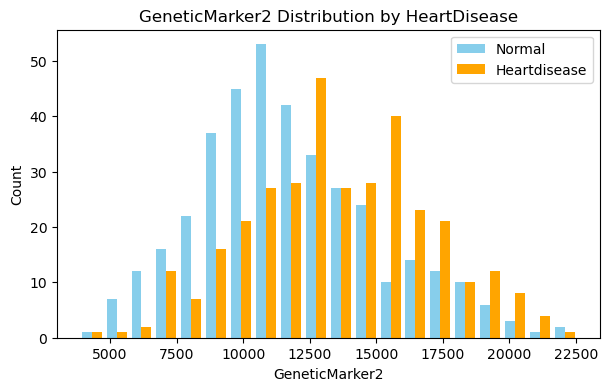

In [34]:
# Explore GeneticMarker2 distribution by HeartDisease
# the amount of heart diseases tends to get higher when the GeneticMarker2 gets higher
plt.figure(figsize=(7, 4))

plt.hist([df[df["HeartDisease"] == 0]["GeneticMarker2"], df[df["HeartDisease"] == 1]["GeneticMarker2"]], bins=20, color=["skyblue", "orange"], label=["Normal", "Heartdisease"])

plt.xlabel('GeneticMarker2')
plt.ylabel('Count')
plt.title('GeneticMarker2 Distribution by HeartDisease')
plt.legend()

plt.show()

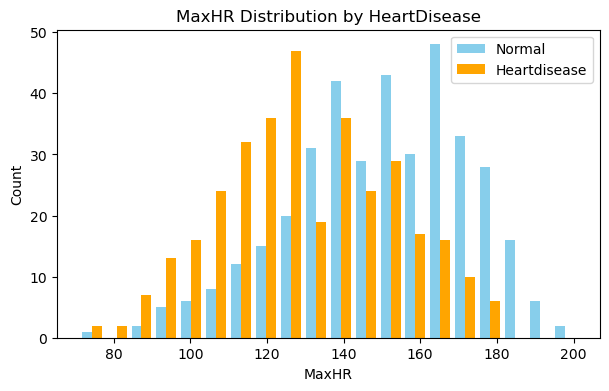

In [35]:
# Explore MaxHR distribution by HeartDisease
# the amount of heart diseases tends to get higher when the MaxHR is lower than 130.
plt.figure(figsize=(7, 4))

plt.hist([df[df["HeartDisease"] == 0]["MaxHR"], df[df["HeartDisease"] == 1]["MaxHR"]], bins=20, color=["skyblue", "orange"], label=["Normal", "Heartdisease"])

plt.xlabel('MaxHR')
plt.ylabel('Count')
plt.title('MaxHR Distribution by HeartDisease')
plt.legend()

plt.show()

In [36]:
# as seen in the bar chart the BodyWeightCategory is irrelevant
# The BodyWeightCategory will be deleted
# The GeneticMarker1 will also be deleted
df = df.drop(columns=['BodyWeightCategory', 'GeneticMarker1'])
df 


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker2,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,11560,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,8575,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,10545,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,10272,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,10368,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,12060,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,12920,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,7296,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,13452,1


### 4. Feature Engineering:

- Encode categorical variables using Dummy Encoding.

In [37]:
# Convert categorical variables into a suitable format for analysis

# Linear encoding for 'ExerciseAngina'
df['ExerciseAngina'].replace({'N':0, 'Y':1}, inplace=True)

# Encode these columns: ['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope']
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope'], dtype='int',)


In [38]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,GeneticMarker2,HeartDisease,Sex_F,...,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,141,289,0,173,0,0.0,11560,0,0,...,0,1,0,0,0,1,0,0,0,1
1,49,158,175,0,151,0,1.0,8575,1,1,...,0,0,1,0,0,1,0,0,1,0
2,37,135,285,0,97,0,0.0,10545,0,0,...,0,1,0,0,0,0,1,0,0,1
3,48,140,214,0,112,1,1.5,10272,1,1,...,1,0,0,0,0,1,0,0,1,0
4,54,149,192,0,124,0,0.0,10368,0,0,...,0,0,1,0,0,1,0,0,0,1


In [39]:
#overview of all the columns 
df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'GeneticMarker2', 'HeartDisease', 'Sex_F',
       'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal',
       'RestingECG_ST', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

### 5. Model Training:

- Import necessary libraries for model training and evaluation
- Split the dataset into training and testing sets.
- Consulting the scikit-learn map and it says to try LinearSVC
- Evaluate the performance of the models using accuracy.

In [40]:
# Import necessary libraries for model training 
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


#import for training and testing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


# Split the dataset into features (X) and target variable (y)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Train a LinearSVC model
lsvc = LinearSVC(max_iter=10000, dual=False)
lsvc.fit(x_train, y_train)


# Make prediciton on the test set
lsvc_predictions = lsvc.predict(x_test)

# Evaluate the LinearSVC model
lsvc_accuracy = accuracy_score(y_test, lsvc_predictions)
lsvc_precision = precision_score(y_test, lsvc_predictions)
lsvc_recall = recall_score(y_test, lsvc_predictions)
lsvc_f1 = f1_score(y_test, lsvc_predictions)

# Display the evaluation scores
print(f'Accuracy with trimmed outliers: {lsvc_accuracy:.4f}')
print(f'precision with trimmed outliers: {lsvc_precision:.4f}')
print(f'Recall with trimmed outliers: {lsvc_recall:.4f}')
print(f'f1 score with trimmed outliers: {lsvc_f1:.4f}')
print(f'Accuracy with raw data: 0.8587')

Accuracy with trimmed outliers: 0.8531
precision with trimmed outliers: 0.8286
Recall with trimmed outliers: 0.8657
f1 score with trimmed outliers: 0.8467
Accuracy with raw data: 0.8587


In [42]:
# lsvc = LinearSVC()
# param_grid = [{
#     "penalty": ["l1", "l2"], "dual": ["auto", True, False], "max_iter": [100000, 200000, 300000]
# }]

# grid_search = GridSearchCV(lsvc, param_grid, cv=5, scoring="accuracy", return_train_score=False, verbose=10)
# grid_search.fit(x_train, y_train)
# grid_search.cv_results_


In [43]:
# dataframe = pd.DataFrame(grid_search.cv_results_)
# dataframe

In [44]:
# dataframe[['param_dual', 'param_max_iter', 'param_penalty', 'mean_test_score']]

In [45]:
# grid_search.best_score_

In [46]:
# grid_search.best_params_

In [47]:
# Train a LinearSVC model
lsvc = LinearSVC(max_iter=100000, dual='auto', penalty='l2')
lsvc.fit(x_train, y_train)


# Make prediciton on the test set
lsvc_predictions = lsvc.predict(x_test)

# Evaluate the LinearSVC model
lsvc_accuracy = accuracy_score(y_test, lsvc_predictions)
lsvc_precision = precision_score(y_test, lsvc_predictions)
lsvc_recall = recall_score(y_test, lsvc_predictions)
lsvc_f1 = f1_score(y_test, lsvc_predictions)

# Display the evaluation scores
print(f'Accuracy with trimmed outliers: {lsvc_accuracy:.4f}')
print(f'precision with trimmed outliers: {lsvc_precision:.4f}')
print(f'Recall with trimmed outliers: {lsvc_recall:.4f}')
print(f'f1 score with trimmed outliers: {lsvc_f1:.4f}')
print(f'Accuracy with raw data: 0.8587')

Accuracy with trimmed outliers: 0.8531
precision with trimmed outliers: 0.8286
Recall with trimmed outliers: 0.8657
f1 score with trimmed outliers: 0.8467
Accuracy with raw data: 0.8587


In [48]:
# Train a Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

# Make predictions on the test set
rfc_predictions = rfc.predict(x_test)

# Evaluate the performance of the model using accuracy
rfc_accuracy = accuracy_score(y_test, rfc_predictions)
rfc_precision = precision_score(y_test, rfc_predictions)
rfc_recall = recall_score(y_test, rfc_predictions)
rfc_f1 = f1_score(y_test, rfc_predictions)

print(f'Accuracy with trimmed outliers: {rfc_accuracy:.4f}')
print(f'precision with trimmed outliers: {rfc_precision:.4f}')
print(f'Recall with trimmed outliers: {rfc_recall:.4f}')
print(f'f1 score with trimmed outliers: {rfc_f1:.4f}')
print(f'Accuracy with raw data: 0.875')

Accuracy with trimmed outliers: 0.8601
precision with trimmed outliers: 0.8310
Recall with trimmed outliers: 0.8806
f1 score with trimmed outliers: 0.8551
Accuracy with raw data: 0.875


In [49]:
rfc = RandomForestClassifier()
param_grid = [{
    "n_estimators": [10, 100, 1000], 
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}]

grid_search = GridSearchCV(rfc, param_grid, cv=3, scoring="accuracy", return_train_score=False, verbose=10)
grid_search.fit(x_train, y_train)
grid_search.cv_results_

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV 1/3; 1/324] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/3; 1/324] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3; 1/324] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/3; 1/324] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3; 1/324] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/3; 1/324] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3; 2/324] START bootstrap=True, max_depth=None, max_features=aut

[CV 3/3; 28/324] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.874 total time=   0.0s
[CV 1/3; 29/324] START bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/3; 29/324] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.858 total time=   0.1s
[CV 2/3; 29/324] START bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/3; 29/324] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.1s
[CV 3/3; 29/324] START bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/3; 29/324] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_e

[CV 1/3; 38/324] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.847 total time=   0.1s
[CV 2/3; 38/324] START bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 2/3; 38/324] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.821 total time=   0.1s
[CV 3/3; 38/324] START bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 3/3; 38/324] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.874 total time=   0.1s
[CV 1/3; 39/324] START bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 1/3; 39/324] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n

[CV 2/3; 47/324] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.832 total time=   0.1s
[CV 3/3; 47/324] START bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 3/3; 47/324] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.879 total time=   0.0s
[CV 1/3; 48/324] START bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000
[CV 1/3; 48/324] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=0.853 total time=   1.4s
[CV 2/3; 48/324] START bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000
[CV 2/3; 48/324] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2,

[CV 1/3; 83/324] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.842 total time=   0.1s
[CV 2/3; 83/324] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/3; 83/324] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.1s
[CV 3/3; 83/324] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/3; 83/324] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.874 total time=   0.1s
[CV 1/3; 84/324] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000
[CV 1/3; 84/324] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10

[CV 3/3; 92/324] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.889 total time=   0.1s
[CV 1/3; 93/324] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 1/3; 93/324] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=0.842 total time=   1.6s
[CV 2/3; 93/324] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 2/3; 93/324] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=0.837 total time=   1.5s
[CV 3/3; 93/324] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 3/3; 93/324] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimator

[CV 2/3; 102/324] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=0.826 total time=   1.4s
[CV 3/3; 102/324] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000
[CV 3/3; 102/324] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=0.874 total time=   1.5s
[CV 1/3; 103/324] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10
[CV 1/3; 103/324] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10;, score=0.832 total time=   0.0s
[CV 2/3; 103/324] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10
[CV 2/3; 103/324] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimat

[CV 1/3; 137/324] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.858 total time=   0.1s
[CV 2/3; 137/324] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/3; 137/324] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.821 total time=   0.1s
[CV 3/3; 137/324] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/3; 137/324] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.1s
[CV 1/3; 138/324] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000
[CV 1/3; 138/324] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estima

[CV 3/3; 146/324] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.874 total time=   0.1s
[CV 1/3; 147/324] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 1/3; 147/324] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=0.837 total time=   1.5s
[CV 2/3; 147/324] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 2/3; 147/324] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=0.826 total time=   1.6s
[CV 3/3; 147/324] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 3/3; 147/324] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_es

[CV 1/3; 156/324] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=0.853 total time=   1.4s
[CV 2/3; 156/324] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000
[CV 2/3; 156/324] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=0.837 total time=   1.3s
[CV 3/3; 156/324] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000
[CV 3/3; 156/324] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=0.879 total time=   1.4s
[CV 1/3; 157/324] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10
[CV 1/3; 157/324] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_est

[CV 1/3; 191/324] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.0s
[CV 2/3; 191/324] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/3; 191/324] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.821 total time=   0.0s
[CV 3/3; 191/324] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/3; 191/324] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.879 total time=   0.0s
[CV 1/3; 192/324] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000
[CV 1/3; 192/324] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samp

[CV 2/3; 200/324] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.0s
[CV 3/3; 200/324] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 3/3; 200/324] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.863 total time=   0.0s
[CV 1/3; 201/324] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 1/3; 201/324] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=0.842 total time=   1.3s
[CV 2/3; 201/324] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 2/3; 201/324] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_sa

[CV 1/3; 210/324] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=0.842 total time=   1.2s
[CV 2/3; 210/324] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000
[CV 2/3; 210/324] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=0.837 total time=   1.2s
[CV 3/3; 210/324] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000
[CV 3/3; 210/324] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=0.879 total time=   1.2s
[CV 1/3; 211/324] START bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10
[CV 1/3; 211/324] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_s

[CV 1/3; 245/324] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.853 total time=   0.0s
[CV 2/3; 245/324] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/3; 245/324] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.832 total time=   0.0s
[CV 3/3; 245/324] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/3; 245/324] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.879 total time=   0.0s
[CV 1/3; 246/324] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000
[CV 1/3; 246/324] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n

[CV 2/3; 254/324] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.842 total time=   0.0s
[CV 3/3; 254/324] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 3/3; 254/324] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.863 total time=   0.1s
[CV 1/3; 255/324] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 1/3; 255/324] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=0.842 total time=   1.3s
[CV 2/3; 255/324] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 2/3; 255/324] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2,

[CV 1/3; 264/324] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=0.837 total time=   1.2s
[CV 2/3; 264/324] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000
[CV 2/3; 264/324] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=0.837 total time=   1.2s
[CV 3/3; 264/324] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000
[CV 3/3; 264/324] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=0.874 total time=   1.2s
[CV 1/3; 265/324] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10
[CV 1/3; 265/324] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5

[CV 1/3; 299/324] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.0s
[CV 2/3; 299/324] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/3; 299/324] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.832 total time=   0.0s
[CV 3/3; 299/324] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/3; 299/324] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.868 total time=   0.0s
[CV 1/3; 300/324] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000
[CV 1/3; 300/324] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n

[CV 2/3; 308/324] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.0s
[CV 3/3; 308/324] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 3/3; 308/324] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.879 total time=   0.0s
[CV 1/3; 309/324] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 1/3; 309/324] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=0.837 total time=   1.3s
[CV 2/3; 309/324] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 2/3; 309/324] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2,

[CV 1/3; 318/324] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=0.847 total time=   1.3s
[CV 2/3; 318/324] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000
[CV 2/3; 318/324] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=0.832 total time=   1.2s
[CV 3/3; 318/324] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000
[CV 3/3; 318/324] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000;, score=0.874 total time=   1.2s
[CV 1/3; 319/324] START bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10
[CV 1/3; 319/324] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5

C:\Users\fadi-\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
486 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
486 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\fadi-\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fadi-\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\fadi-\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\fadi-\anaconda3\Lib\site-packag

{'mean_fit_time': array([1.33824348e-03, 1.00008647e-03, 6.82195028e-04, 6.78857168e-04,
        6.69876734e-04, 6.72499339e-04, 6.69082006e-04, 6.70909882e-04,
        6.69082006e-04, 1.02249781e-03, 3.30924988e-04, 8.46624374e-04,
        6.66856766e-04, 6.67572021e-04, 6.66062037e-04, 6.65903091e-04,
        6.71227773e-04, 6.73055649e-04, 6.66936239e-04, 6.66697820e-04,
        6.69002533e-04, 6.67254130e-04, 3.52541606e-04, 9.98258591e-04,
        5.06718953e-04, 3.33468119e-04, 3.33388646e-04, 1.67261759e-02,
        1.59720421e-01, 1.64447721e+00, 1.69031620e-02, 1.62318150e-01,
        1.64475139e+00, 1.66025956e-02, 1.42553012e-01, 1.58735776e+00,
        1.74534321e-02, 1.43895388e-01, 1.56837026e+00, 1.60644849e-02,
        1.55882120e-01, 1.48712858e+00, 1.75723235e-02, 1.42327309e-01,
        1.45606351e+00, 1.65629387e-02, 1.40260617e-01, 1.38940843e+00,
        1.59915288e-02, 1.39058193e-01, 1.42682870e+00, 1.77338123e-02,
        1.41435623e-01, 1.40232976e+00, 8.40425

In [50]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 10}

In [51]:
grid_search.best_score_

0.8666666666666667

In [52]:
rfc = RandomForestClassifier(bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=2, min_samples_split=10, n_estimators=100)
rfc.fit(x_train, y_train)

# Make predictions on the test set
rfc_predictions = rfc.predict(x_test)

# Evaluate the performance of the model using accuracy
rfc_accuracy = accuracy_score(y_test, rfc_predictions)
rfc_precision = precision_score(y_test, rfc_predictions)
rfc_recall = recall_score(y_test, rfc_predictions)
rfc_f1 = f1_score(y_test, rfc_predictions)

print(f'Accuracy with trimmed outliers: {rfc_accuracy:.4f}')
print(f'precision with trimmed outliers: {rfc_precision:.4f}')
print(f'Recall with trimmed outliers: {rfc_recall:.4f}')
print(f'f1 score with trimmed outliers: {rfc_f1:.4f}')
print(f'Accuracy with raw data: 0.875')

# Accuracy with trimmed outliers: 0.8671
# precision with trimmed outliers: 0.8243
# Recall with trimmed outliers: 0.9104
# f1 score with trimmed outliers: 0.8652
# Accuracy with raw data: 0.875

Accuracy with trimmed outliers: 0.8741
precision with trimmed outliers: 0.8356
Recall with trimmed outliers: 0.9104
f1 score with trimmed outliers: 0.8714
Accuracy with raw data: 0.875


In [53]:
# Train a desicion tree
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

# Make predictions on the test set
dtc_predictions = dtc.predict(x_test)

# Evaluate the performance of the model using accuracy
dtc_accuracy = accuracy_score(y_test, dtc_predictions)
dtc_precision = precision_score(y_test, dtc_predictions)
dtc_recall = recall_score(y_test, dtc_predictions)
dtc_f1 = f1_score(y_test, dtc_predictions)


print(f'Accuracy with trimmed outliers: {dtc_accuracy:.4f}')
print(f'precision with trimmed outliers: {dtc_precision:.4f}')
print(f'Recall with trimmed outliers: {dtc_recall:.4f}')
print(f'f1 score with trimmed outliers: {dtc_f1:.4f}')
print(f'Accuracy with raw data: NaN')

Accuracy with trimmed outliers: 0.8322
precision with trimmed outliers: 0.8116
Recall with trimmed outliers: 0.8358
f1 score with trimmed outliers: 0.8235
Accuracy with raw data: NaN


In [54]:
# Train a Logistic Regression
clf = LogisticRegression(max_iter=10000)
clf.fit(x_train, y_train)

# Make predictions on the test set
clf_predictions = clf.predict(x_test)

# Evaluate the performance of the model using accuracy
clf_accuracy = accuracy_score(y_test, clf_predictions)
clf_precision = precision_score(y_test, clf_predictions)
clf_recall = recall_score(y_test, clf_predictions)
clf_f1 = f1_score(y_test, clf_predictions)

print(f'Accuracy with trimmed outliers: {clf_accuracy:.4f}')
print(f'precision with trimmed outliers: {clf_precision:.4f}')
print(f'Recall with trimmed outliers: {clf_recall:.4f}')
print(f'f1 score with trimmed outliers: {clf_f1:.4f}')
print(f'Accuracy with raw data: NaN')

Accuracy with trimmed outliers: 0.8462
precision with trimmed outliers: 0.8261
Recall with trimmed outliers: 0.8507
f1 score with trimmed outliers: 0.8382
Accuracy with raw data: NaN


In [55]:
# Train a SVM model
svc = SVC()
svc.fit(x_train, y_train)

# Make predictions on the test set
svc_predictions = svc.predict(x_test)

# Evaluate the performance of the model
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_precision = precision_score(y_test, svc_predictions)
svc_recall = recall_score(y_test, svc_predictions)
svc_f1 = f1_score(y_test, svc_predictions)


print(f'Accuracy with trimmed outliers: {svc_accuracy:.4f}')
print(f'precision with trimmed outliers: {svc_precision:.4f}')
print(f'Recall with trimmed outliers: {svc_recall:.4f}')
print(f'f1 score with trimmed outliers: {svc_f1:.4f}')
print(f'Accuracy with raw data: NaN')

Accuracy with trimmed outliers: 0.5594
precision with trimmed outliers: 0.5294
Recall with trimmed outliers: 0.5373
f1 score with trimmed outliers: 0.5333
Accuracy with raw data: NaN


Looking at the scores LinearSVC and Randomforestclassifier perform the best.